### Objective: Conduct Combined Analysis to gather insights on Bosch Assembly Line: 
This notebook contains csv files extracted from 3 notebooks as under:
1. Bosch_Category_Analysis
2. Bosch_Numeric_Analysis
3. Bosch_Date_Analysis 

Due to large file sizes, I decided to perform combined analysis separately. 

In [1]:
#Import Packages: 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import altair as alt
import re
import warnings
warnings.filterwarnings('ignore')

### Open saved csv tables from parent notebooks: 
1. Bosch Category Analysis
2. Bosch Numeric Analysis
3. Bosch Date Analysis

In [2]:
#Open file from bosch_numeric analysis notebook:
df_numeric_grouped = pd.read_csv('numeric_grouped.csv')

#Open file from bosch_data analysis notebook
df_date = pd.read_csv('date_summary.csv', index_col=0)

##Open file from bosch_category analysis notebook
df_components = pd.read_csv('components_summary_with_keys.csv', index_col=0) #This file already contains keys for joining tables.
                                                                #Similarly will build keys for date and numeric tables.    
    
#If you notice, we did not supply index_col = 0 for numeric table
#This is because the parent file was stored as a groubed by file with index.

### Prepare keys for numeric and date tables:
1. Goal here is to connect category table with numeric and date tables.
2. To do this, we have already created category table with connecting numeric and date keys. 
3. This connection was established based on the fact that category feature was 1 feature ahead of numeric feature and 1 feature behind date feature. Example: category F25 is linked to numeric feature F24, and date feature D26. 
4. Hence, we will use this as a reasoning to build a single consolidated table to see the flow.
5. Another, point to be noted is that, the last category feature at the of the line and station number, say L0_S1_31, there is no associated date time L0_S1_D32 present there.
6. Hence, we should connect category table with numeric and then with date feature. 

In [3]:
#Numeric Table:
#Numeric Connection Key: To connect category table with numeric table
#Lets' extract only the digits from production line columns and store this value as an integer. 
#Then, we will use this integer value as a foreign key to connect with the category table. 

#Connecting numeric table with category table: 

df_numeric_grouped['connection_key_numeric'] = df_numeric_grouped['production_line'].apply(lambda x: re.sub(r'([^\d+]+)','', x)).astype('int')

#*******This step will not be required. If we do this then we would need to add 2 instead of 1*****
#2. Connecting numeric table with date table:
#We will also create an additional connection_date_key within numeric table,
#just in case we want to only analyze relationship between date and numeric tables only. 
#To do this, numeric category feature F0 would have a date feature of D1. 
#Hence, we would need add 1 to connection_key_numeric to build that relationship. 
#df_numeric_grouped['connection_key_date'] = df_numeric_grouped.connection_key_numeric+2


In [4]:
#Date Table: 
#Date Connection key: To connect other tables such as numeric and category with date table.
##Lets' extract only the digits from production line columns and store this value as an integer.
#Then, We will use this integer value as a foreign key to connect with other tables.
df_date['connection_key_date'] = df_date['production_line'].apply(lambda x: re.sub(r'([^\d+]+)','', x)).astype('int')

In [5]:
#Let's display tables, aloong wtih shape and null values:
#Create empty list of tables:
lst = [df_components, df_numeric_grouped, df_date]

#Iterate over each table, get shape, null values and display of only first 2 rows:
for i in lst:
    df_components.name = 'A. Category Table shape, missing values and display'
    df_numeric_grouped.name = 'B. Numeric Table shape missing values and display'
    df_date.name = 'C. Date Table shape missing values and display'
    display(i.name, ('Shape:', i.shape, 'Missing Values:', i.isnull().sum()[i.isnull().sum()!=0]), i)#.head(2))
    
#Here you will notice that number of observations between category, numeric and date tables are not the same. 
#Suggesting not every category has all the values of numeric and date features. 
#It seems only some categories, which might be acting as a node category will have all non-null values after joining.

'A. Category Table shape, missing values and display'

('Shape:', (4258, 7), 'Missing Values:', Series([], dtype: int64))

,production_line,number_of_components,components,times_component_used,connection_key_category,connection_key_numeric,connection_key_date
0,L0_S1_F25,1,T1,25,125,124,126
1,L0_S1_F27,1,T9,25,127,126,128
2,L0_S1_F29,1,T1,27,129,128,130
3,L0_S1_F31,3,T9,25,131,130,132
4,L0_S1_F31,3,T24,1,131,130,132
...,...,...,...,...,...,...,...
4253,L3_S49_F4237,1,T1,43,3494237,3494236,3494238
4254,L3_S49_F4239,1,T1,33,3494239,3494238,3494240
4255,L3_S49_F4240,3,T16,33,3494240,3494239,3494241
4256,L3_S49_F4240,3,T2,7,3494240,3494239,3494241


'B. Numeric Table shape missing values and display'

('Shape:', (1936, 6), 'Missing Values:', test_values_std    43
 dtype: int64)

,production_line,response,test_values_mean,test_values_std,count_mean,connection_key_numeric
0,L0_S0_F0,0,-0.099422,0.222564,5778.051724,0
1,L0_S0_F0,1,-0.016532,0.151396,45.670886,0
2,L0_S0_F10,0,-0.130318,0.302040,30466.090909,10
3,L0_S0_F10,1,-0.179889,0.242620,200.444444,10
4,L0_S0_F12,0,0.113607,0.243375,23937.642857,12
...,...,...,...,...,...,...
1931,L3_S51_F4258,1,0.000500,0.000707,151.000000,3514258
1932,L3_S51_F4260,0,0.129337,0.175427,744.387500,3514260
1933,L3_S51_F4260,1,0.002000,0.002000,100.666667,3514260
1934,L3_S51_F4262,0,0.051629,0.167102,1701.457143,3514262


'C. Date Table shape missing values and display'

('Shape:', (1156, 6), 'Missing Values:', std_dev    2
 dtype: int64)

,production_line,mean_time,std_dev,min_time,max_time,connection_key_date
0,L0_S0_D1,881.735483,506.722192,0.0,1713.0,1
1,L0_S0_D3,881.735483,506.722192,0.0,1713.0,3
2,L0_S0_D5,881.735483,506.722192,0.0,1713.0,5
3,L0_S0_D7,881.735483,506.722192,0.0,1713.0,7
4,L0_S0_D9,881.735483,506.722192,0.0,1713.0,9
...,...,...,...,...,...,...
1151,L3_S51_D4255,1022.603194,433.922535,0.0,1457.0,3514255
1152,L3_S51_D4257,1022.603194,433.922535,0.0,1457.0,3514257
1153,L3_S51_D4259,1022.603194,433.922535,0.0,1457.0,3514259
1154,L3_S51_D4261,1022.603194,433.922535,0.0,1457.0,3514261


### Observation: 
We noticed that Numeric table and date table had certain production lines with null standard deviation (no spread).  Let's investigate this further. 

In [6]:
#See null std values in numeric table and date table: 
print('Unique Response:', df_numeric_grouped['response'][df_numeric_grouped['test_values_std'].isnull()].unique())

#Unique test mean value failures where standard deviation was zero: (For later reference)  
responsefailure_atnullstd = df_numeric_grouped['test_values_mean'][df_numeric_grouped['test_values_std'].isnull()].unique()

#Unique test mean value failures where standard deviation was zero: (For later reference)  
meantime_atnullstd = df_date['mean_time'][df_date['std_dev'].isnull()].unique()

print('Unique Test Mean of Failure at null Std:', df_numeric_grouped['test_values_mean'][df_numeric_grouped['test_values_std'].isnull()].unique())

print('Mean Time at null Std:', df_date['mean_time'][df_date['std_dev'].isnull()].unique())
df_numeric_grouped[df_numeric_grouped['test_values_std'].isnull()].head()


#What we observe that all these production lines where spread was null, the inspection respone was 1 (failure)
#and had certain unique test mean values and mean time values, which was quite interesting. 

Unique Response: [1]
Unique Test Mean of Failure at null Std: [ 0.    -0.045  0.001  0.046  0.009 -0.095 -0.098 -0.118  0.016 -0.036]
Mean Time at null Std: [1006.  570.]


,production_line,response,test_values_mean,test_values_std,count_mean,connection_key_numeric
111,L0_S14_F378,1,0.0,NaN,681.0,14378
129,L0_S15_F409,1,0.0,NaN,640.0,15409
261,L0_S2_F52,1,0.0,NaN,1817.0,252
281,L0_S3_F88,1,0.0,NaN,1792.0,388
525,L1_S24_F1486,1,0.0,NaN,203.0,1241486


In [7]:
#Ok, so let's fill these null values with 0 and save files as CSV for later use.

df_numeric_grouped['test_values_std'] = df_numeric_grouped['test_values_std'].fillna(value = 0.0)
df_date['std_dev'] = df_date['std_dev'].fillna(value = 0.0)

### Rename Column names: 

In [8]:
#Renaming column names in numeric and date tables for better clarity: 
df_numeric_grouped = df_numeric_grouped.rename(columns= {'count_mean': 'test_values_count_mean'})
df_date = df_date.rename(columns= {'mean_time': 'time_mean', 'std_dev': 'time_std', 'min_time': 'time_min', 'max_time': 'time_max'})

### Saving numeric and date table with keys as csv: 

In [9]:
#Saving numeric grouped file and date file with connecting keys:  
df_numeric_grouped.to_csv('numeric_grouped_summary_with_keys.csv')
df_date.to_csv('date_summary_with_keys.csv')

#ok, so we have 3 files components_summary_with_keys, numeric_summary_with_keys, and date_summary_with_keys 
#which we will be joining in two phases to create insights from joined tables.


### Joining Table Schema and reasoning:
1. First join, we will connect Category table with the numeric table. 
    1. This will help us focus on production lines which contains both category components and numeric response (pass/fail)
2. Second join, we will connect table from first join with the date table. 
    2. This will help us investigate those categories where assembly components, numeric test conditions and assembly time is given. It is possible that these categories act as a node category which takes unfinished sub assemblies from other lines to complete the assembly (this assumption is open for further investigation).

### Numeric Feature Engineering:  
However, before we join the table, I would like to pre-process numeric table and create new features.
1. % Response Breakdown
2. Cosine similarity between various production lines and highest %response breakdown. 

In [10]:
#Create % Response Breakdown: 
#Groupby production line and get count_mean_total for both responses (pass/fail)
#df_numeric_grouped.groupby(['production_line']).agg({'count_mean': 'sum'})

In [11]:
#Transform 
#df_numeric_grouped.groupby(['production_line']).agg({'count_mean': 'sum'})

In [12]:
#Let's use transform function here so that we can merge total of count_mean per line with df_numeric grouped by column : 
#First, select columns we are interested in: 
cols = ['production_line', 'test_values_count_mean']

In [13]:
#Create transform_df containing a new column count_mean_total: 
transform_df = df_numeric_grouped[cols].groupby('production_line').transform(np.sum).rename(columns = {'test_values_count_mean': 'count_mean_total'})


In [14]:
#Merge transfrom_df with df_numeric_grouped: 
df_numeric_transform = pd.merge(left = df_numeric_grouped, right = transform_df, left_index=True, right_index=True)

In [15]:
#Calculate percentage of pass Vs failed assemblies per line: 
df_numeric_transform['percent_response_breakdown'] =  df_numeric_transform['test_values_count_mean']/df_numeric_transform['count_mean_total']*100

In [16]:
df_numeric_transform.head()

,production_line,response,test_values_mean,test_values_std,test_values_count_mean,connection_key_numeric,count_mean_total,percent_response_breakdown
0,L0_S0_F0,0,-0.099422,0.222564,5778.051724,0,5823.722610,99.215778
1,L0_S0_F0,1,-0.016532,0.151396,45.670886,0,5823.722610,0.784222
2,L0_S0_F10,0,-0.130318,0.302040,30466.090909,10,30666.535354,99.346374
3,L0_S0_F10,1,-0.179889,0.242620,200.444444,10,30666.535354,0.653626
4,L0_S0_F12,0,0.113607,0.243375,23937.642857,12,24138.087302,99.169593


In [17]:
#Max failure point where response is 1: 
max_fail_response_index_1 = df_numeric_transform['percent_response_breakdown'][df_numeric_transform['response']==1].idxmax()
max_fail_response_value_1 = df_numeric_transform['percent_response_breakdown'][df_numeric_transform['response']==1].max()
max_fail_response_line_1 = df_numeric_transform['production_line'].loc[max_fail_response_index_1]
print('Index:',  max_fail_response_index_1,'\nPercentage:', max_fail_response_value_1, '\nProduction Line:', max_fail_response_line_1)

#So here, we can see that line 3 and station 51 while assembling feature 4262 has a failure reaspne of 36.8%.  

Index: 311 
Percentage: 36.821641492094166 
Production Line: L0_S8_F149


In [18]:
#Getting production line lables where % failure is greater than 27%: 
line_failures_greater27 = df_numeric_transform['production_line'][(df_numeric_transform['percent_response_breakdown']>27) & (df_numeric_transform['response']==1)]
lables_greater27 = [i for i in line_failures_greater27] 

### Plot of Line failures:  

In [19]:
#Percent Response Breakdown of production line failed Vs passed. 
#Yellow color indicates assembly failures above 0% 
#Black background with white lines indicate % lines passed inspection test. 
#Red bubbles indicates assembly failures points above 10% 
#Black bubbles indicate top 5 line failures.
#Small black circles indicate surrounding clusters of line failures.   

pass_chart = (alt.Chart(df_numeric_transform)
              .mark_area(color = 'black',
                         opacity = 0.3)
              .encode(x = alt.X('production_line:N',
                                axis = None),
                      y = alt.Y('percent_response_breakdown:Q',
                                title = '% Response Failure'))
              .transform_filter(alt.FieldEqualPredicate(field='response',
                                                        equal=0))
              .properties(width = 600))


fail_chart_all = (alt.Chart(df_numeric_transform)
              .mark_area(color = 'gold')
              .encode(x = alt.X('production_line:N',
                                axis = None),
                      y = alt.Y('percent_response_breakdown:Q'))
              .transform_filter(alt.FieldEqualPredicate(field='response',
                                                        equal=1))
              .properties(width = 600))


fail_chart_greater10 = (alt.Chart(df_numeric_transform[df_numeric_transform['percent_response_breakdown']>=10])
                 .mark_circle(color = 'red',
                              stroke='white')
                 .encode(x = alt.X('production_line:N',
                                   title = 'Production Line Failure > 10%',
                                   axis = alt.Axis(values = lables_greater27,
                                                   labelAngle=-45,
                                                   labelFontSize=10,
                                                   labelFontWeight='bold')),
                         y = alt.Y('percent_response_breakdown:Q'),
                         tooltip = ['production_line:N', 'percent_response_breakdown:Q'],
                         size = alt.Size('percent_response_breakdown:Q',
                                         scale=alt.Scale(range=[0, 600]),
                                         legend=alt.Legend(title='% Line Failure')))
                 .transform_filter(alt.FieldEqualPredicate(field='response', equal=1))
                 .properties(width = 600))



fail_chart_top5 = (alt.Chart(df_numeric_transform[df_numeric_transform['percent_response_breakdown']>27])
                 .mark_circle(color = 'black',
                              #stroke='white',
                              size = 600)
                 .encode(x = alt.X('production_line:N',
                                   title = 'Line Failure',
                                   axis = None),
                         y = alt.Y('percent_response_breakdown:Q'),
                         tooltip = ['production_line:N', 'percent_response_breakdown:Q'])
                 .transform_filter(alt.FieldEqualPredicate(field='response',
                                                           equal=1))
                 .properties(width = 600))


failure_clusters = (alt.Chart(df_numeric_transform[(df_numeric_transform['percent_response_breakdown']<27)\
                                                   & (df_numeric_transform['percent_response_breakdown']>10)])
                 .mark_circle(color = 'black',
                              #stroke='white',
                              size = 10, opacity = 0.9)
                 .encode(x = alt.X('production_line:N',
                                   title = 'Line Failure',
                                   axis = None),
                         y = alt.Y('percent_response_breakdown:Q'),
                         tooltip = ['production_line:N', 'percent_response_breakdown:Q'])
                 .transform_filter(alt.FieldEqualPredicate(field='response',
                                                           equal=1))
                 .properties(width = 600))

chart_response = ((fail_chart_greater10+pass_chart+fail_chart_all+ fail_chart_top5 + failure_clusters)
                  .properties(title = 'Production lines >27% failure rate and surrounding clusters')
                  .configure_axis(grid=False))

chart_response

alt.LayerChart(...)

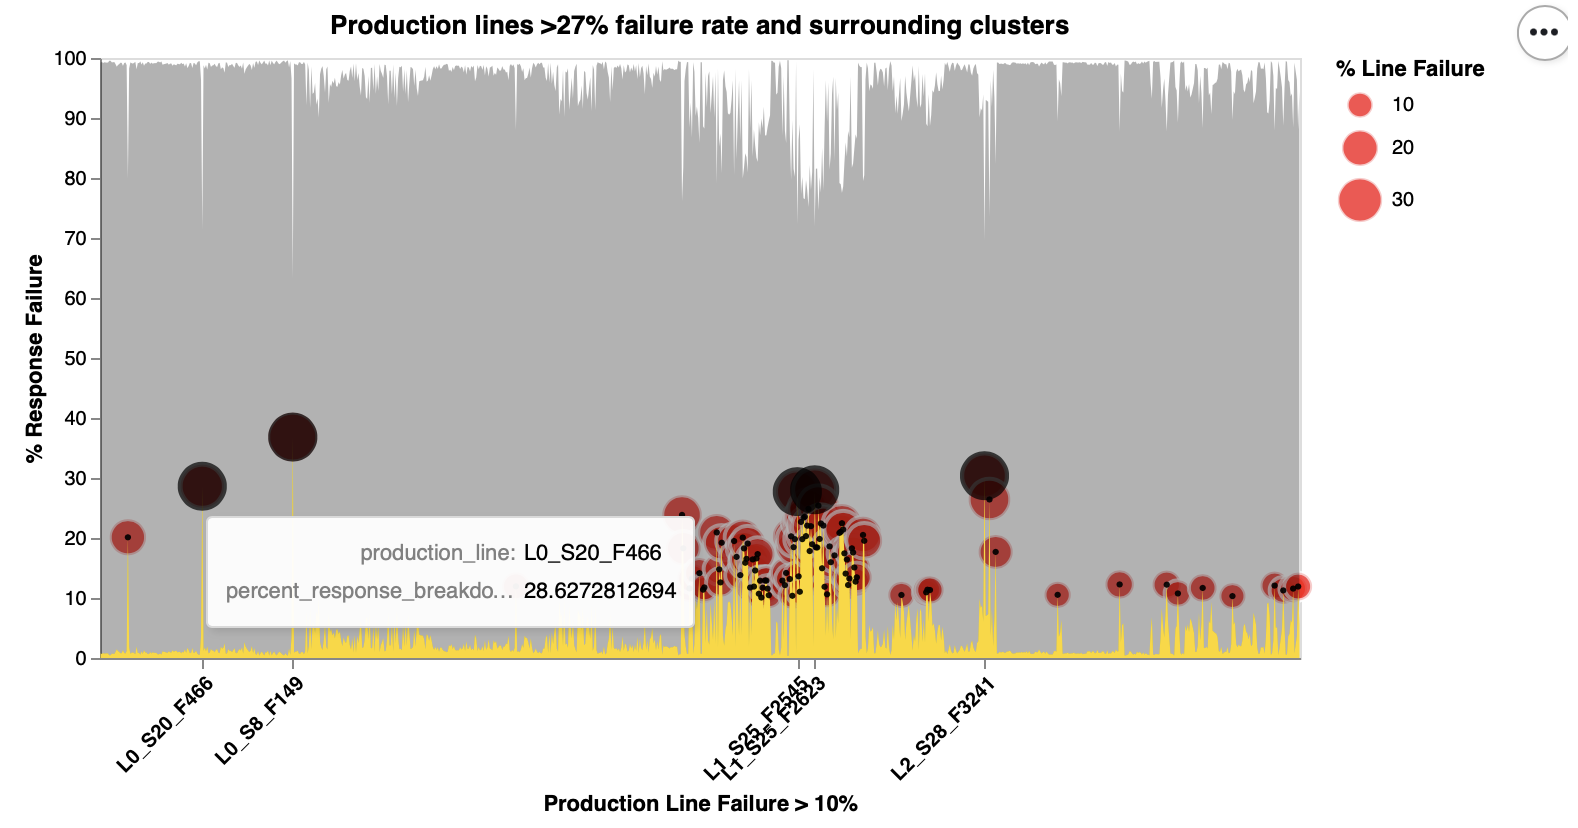

### Observation: 
1. From chart above, big black bubbles show top 5 line failure ranging between 27% and 36%.
2. Size of red bubbles indicate % failure of 10%, 20%, 30% and more.
3. Small black points, indicate formation of clusters mid-way during assembly operations.    

### Cosine similarity: 
1. We will compare each line with maximum failure rate to check for similarity. 
2. To do this we will need to account for number of sub-components, test conditions and processing time as input to similarity features. 

Hence, let's merge tables as per joining schema before computing cosine similarity.   

### Merge Tables:
1. First Merge: Category with Numeric 
2. Second Merge: First Merge with Date
3. Re-assign column names

In [20]:
#First Merge: Category with Numeric table:  
cat_num = pd.merge(left = df_components, right = df_numeric_transform, on ='connection_key_numeric', how = 'left',suffixes=('_category', '_numeric') )

cat_num.head()
#Here. I am using left join to see how mnay lines do not have any test conditions recorded against it. 
#These lines could be pre-processing lines required for assembly operations. 

,production_line_category,number_of_components,components,times_component_used,connection_key_category,connection_key_numeric,connection_key_date,production_line_numeric,response,test_values_mean,test_values_std,test_values_count_mean,count_mean_total,percent_response_breakdown
0,L0_S1_F25,1,T1,25,125,124,126,L0_S1_F24,0.0,0.055989,0.238826,2455.296703,2473.694662,99.256256
1,L0_S1_F25,1,T1,25,125,124,126,L0_S1_F24,1.0,-0.018592,0.148630,18.397959,2473.694662,0.743744
2,L0_S1_F27,1,T9,25,127,126,128,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,L0_S1_F29,1,T1,27,129,128,130,L0_S1_F28,0.0,0.031534,0.144634,1319.324000,1326.536000,99.456328
4,L0_S1_F29,1,T1,27,129,128,130,L0_S1_F28,1.0,0.034522,0.156244,7.212000,1326.536000,0.543672


In [21]:
#Second Merge: First Merge table with date:
cat_num_date = pd.merge(left = cat_num, right = df_date, on = 'connection_key_date', how = 'left').rename(columns = {'production_line': 'production_line_date'})

In [22]:
#Re-assign column positions and get rid of connection keys:  
print(cat_num_date.columns)
cat_num_date.head()

#Here if we look at 'L0_S1_F25' columns 'times_component_used' and 'count_mean'
#We noticed that T1 component was used 25 times out of which 2455 times it passed while 18 times this assembly failed.
#Hence, bosch has run multiple production iterations to capture 2473 test conditions on T1.

#hence, we will create another columns count_production_runs to capture this understanding.

Index(['production_line_category', 'number_of_components', 'components',
       'times_component_used', 'connection_key_category',
       'connection_key_numeric', 'connection_key_date',
       'production_line_numeric', 'response', 'test_values_mean',
       'test_values_std', 'test_values_count_mean', 'count_mean_total',
       'percent_response_breakdown', 'production_line_date', 'time_mean',
       'time_std', 'time_min', 'time_max'],
      dtype='object')


,production_line_category,number_of_components,components,times_component_used,connection_key_category,connection_key_numeric,connection_key_date,production_line_numeric,response,test_values_mean,test_values_std,test_values_count_mean,count_mean_total,percent_response_breakdown,production_line_date,time_mean,time_std,time_min,time_max
0,L0_S1_F25,1,T1,25,125,124,126,L0_S1_F24,0.0,0.055989,0.238826,2455.296703,2473.694662,99.256256,L0_S1_D26,881.732436,506.721745,0.0,1713.0
1,L0_S1_F25,1,T1,25,125,124,126,L0_S1_F24,1.0,-0.018592,0.148630,18.397959,2473.694662,0.743744,L0_S1_D26,881.732436,506.721745,0.0,1713.0
2,L0_S1_F27,1,T9,25,127,126,128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,L0_S1_F29,1,T1,27,129,128,130,L0_S1_F28,0.0,0.031534,0.144634,1319.324000,1326.536000,99.456328,L0_S1_D30,881.733004,506.721835,0.0,1713.0
4,L0_S1_F29,1,T1,27,129,128,130,L0_S1_F28,1.0,0.034522,0.156244,7.212000,1326.536000,0.543672,L0_S1_D30,881.733004,506.721835,0.0,1713.0


In [23]:
#Count number of times production was run on an average to collect various test conditions: 
cat_num_date['count_production_run'] = cat_num_date['test_values_count_mean']/cat_num_date['times_component_used']
cat_num_date = round(cat_num_date,0)
cat_num_date.head()

,production_line_category,number_of_components,components,times_component_used,connection_key_category,connection_key_numeric,connection_key_date,production_line_numeric,response,test_values_mean,test_values_std,test_values_count_mean,count_mean_total,percent_response_breakdown,production_line_date,time_mean,time_std,time_min,time_max,count_production_run
0,L0_S1_F25,1,T1,25,125,124,126,L0_S1_F24,0.0,0.0,0.0,2455.0,2474.0,99.0,L0_S1_D26,882.0,507.0,0.0,1713.0,98.0
1,L0_S1_F25,1,T1,25,125,124,126,L0_S1_F24,1.0,-0.0,0.0,18.0,2474.0,1.0,L0_S1_D26,882.0,507.0,0.0,1713.0,1.0
2,L0_S1_F27,1,T9,25,127,126,128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,L0_S1_F29,1,T1,27,129,128,130,L0_S1_F28,0.0,0.0,0.0,1319.0,1327.0,99.0,L0_S1_D30,882.0,507.0,0.0,1713.0,49.0
4,L0_S1_F29,1,T1,27,129,128,130,L0_S1_F28,1.0,0.0,0.0,7.0,1327.0,1.0,L0_S1_D30,882.0,507.0,0.0,1713.0,0.0


In [24]:
#Here, we will get rid of connection keys, and re-assign columns position for better understabding:
final_merge =cat_num_date[['production_line_category',
              'production_line_numeric',
              'production_line_date',
              'components',
              'number_of_components',
              'times_component_used',
              'test_values_mean',
              'test_values_std',
              'test_values_count_mean',
              'count_mean_total',
              'time_mean', 
              'time_std', 
              'time_min',
              'time_max',
              'response',
              'count_production_run',
              'percent_response_breakdown']]

print(final_merge.columns, '\nShape:',final_merge.shape)
#pd.set_option('display.max_rows', None)
final_merge.head()


Index(['production_line_category', 'production_line_numeric',
       'production_line_date', 'components', 'number_of_components',
       'times_component_used', 'test_values_mean', 'test_values_std',
       'test_values_count_mean', 'count_mean_total', 'time_mean', 'time_std',
       'time_min', 'time_max', 'response', 'count_production_run',
       'percent_response_breakdown'],
      dtype='object') 
Shape: (4792, 17)


,production_line_category,production_line_numeric,production_line_date,components,number_of_components,times_component_used,test_values_mean,test_values_std,test_values_count_mean,count_mean_total,time_mean,time_std,time_min,time_max,response,count_production_run,percent_response_breakdown
0,L0_S1_F25,L0_S1_F24,L0_S1_D26,T1,1,25,0.0,0.0,2455.0,2474.0,882.0,507.0,0.0,1713.0,0.0,98.0,99.0
1,L0_S1_F25,L0_S1_F24,L0_S1_D26,T1,1,25,-0.0,0.0,18.0,2474.0,882.0,507.0,0.0,1713.0,1.0,1.0,1.0
2,L0_S1_F27,NaN,NaN,T9,1,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,L0_S1_F29,L0_S1_F28,L0_S1_D30,T1,1,27,0.0,0.0,1319.0,1327.0,882.0,507.0,0.0,1713.0,0.0,49.0,99.0
4,L0_S1_F29,L0_S1_F28,L0_S1_D30,T1,1,27,0.0,0.0,7.0,1327.0,882.0,507.0,0.0,1713.0,1.0,0.0,1.0


### Calculate cosine similarity with maximum failure line: 

In [25]:
#Max failure point where response is 1: 
max_fail_response_index = final_merge['percent_response_breakdown'][(final_merge['response']==1)].idxmax()
max_fail_response_value = final_merge['percent_response_breakdown'][final_merge['response']==1].max()
max_fail_response_line = final_merge['production_line_category'].loc[max_fail_response_index]
print('Index:',  max_fail_response_index,'\nPercentage:', max_fail_response_value, '\nProduction Line:', max_fail_response_line)

Index: 3440 
Percentage: 28.0 
Production Line: L1_S25_F2546


In [26]:
#Function for calculating cosine similarity: 
def cosine_similarity(vec_x, vec_y):
    return np.dot(vec_x, vec_y)/(np.linalg.norm(vec_x) * np.linalg.norm(vec_y))

In [27]:
#Cosine similarity between manufacturing line and maximum failure point: 

#Create empty list to store cosine_similarity values:

cosine_sim = []

#Select cosine features: 
#Here I have selected various input features to make cosine similarity sensitive to feature changes.
cosine_features = ['number_of_components', 'times_component_used', 'count_production_run', 'test_values_mean', 'test_values_std', 'test_values_count_mean', 'time_mean', 'time_std']

#Get cosine features of maximum failure point: 
vec_y = final_merge[cosine_features].loc[max_fail_response_index]

#Get cosine features for the rest of the manufacturing line: 
vec_x = final_merge[cosine_features]

#Iterate over entire dataframe: 
for i in range(len(final_merge[cosine_features])):
    cosine_sim.append(cosine_similarity(final_merge[cosine_features].iloc[i].values, vec_y.values)*100)
    
#Create new column 'cosine_similarity':
final_merge['cosine_similarity_max_failure'] = np.round(cosine_sim, decimals=1) 

In [28]:
#Final merge table along with cosine similarity: 
#Please note, this table also contains 'max_fail_response_index' which should be removed from the dataframe. 
final_merge.loc[max_fail_response_index]

production_line_category         L1_S25_F2546
production_line_numeric          L1_S25_F2545
production_line_date             L1_S25_D2547
components                                 T1
number_of_components                        1
times_component_used                        7
test_values_mean                            0
test_values_std                             0
test_values_count_mean                      1
count_mean_total                            4
time_mean                                 956
time_std                                  255
time_min                                  334
time_max                                 1256
response                                    1
count_production_run                        0
percent_response_breakdown                 28
cosine_similarity_max_failure             100
Name: 3440, dtype: object

In [29]:
#Removing max_fail_response_index from final merge dataframe:
lines_similar = final_merge.drop(labels= final_merge.index[max_fail_response_index])

In [30]:
#View result_similarity: 
lines_similar.head()

#Here we notice that observations do not have cosine similarity. 
#That is because while merging, some production lines were observed to not have test or date time conditions associated with it. 
#As a result, it is possible that bosch was observing few specific lines where recording inspection test results and assembly time was necessary. 
#Hence, let's create a nother column, where we can see which lines had all measurements given Vs rest. 

,production_line_category,production_line_numeric,production_line_date,components,number_of_components,times_component_used,test_values_mean,test_values_std,test_values_count_mean,count_mean_total,time_mean,time_std,time_min,time_max,response,count_production_run,percent_response_breakdown,cosine_similarity_max_failure
0,L0_S1_F25,L0_S1_F24,L0_S1_D26,T1,1,25,0.0,0.0,2455.0,2474.0,882.0,507.0,0.0,1713.0,0.0,98.0,99.0,37.1
1,L0_S1_F25,L0_S1_F24,L0_S1_D26,T1,1,25,-0.0,0.0,18.0,2474.0,882.0,507.0,0.0,1713.0,1.0,1.0,1.0,96.6
2,L0_S1_F27,NaN,NaN,T9,1,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,L0_S1_F29,L0_S1_F28,L0_S1_D30,T1,1,27,0.0,0.0,1319.0,1327.0,882.0,507.0,0.0,1713.0,0.0,49.0,99.0,59.1
4,L0_S1_F29,L0_S1_F28,L0_S1_D30,T1,1,27,0.0,0.0,7.0,1327.0,882.0,507.0,0.0,1713.0,1.0,0.0,1.0,96.6


### Lines with/without datetime and test conditions:

In [31]:
#Creating another column named measurement_status. 
#This will record whether the manufacturing line had date time and test measurements given or not: 

#First step: Get measurements where both date and test conditions are missing:
lines_similar['measurement_status'] = np.where(lines_similar['cosine_similarity_max_failure'].notnull(), 'yes', 'no')

#Second step: Get date time index where assembly time is given but has no cosine similarity: (Missing test conditions)

only_datetime_index = lines_similar[(lines_similar['measurement_status']=='no') & (lines_similar['production_line_date'].notnull())].index

#Use only_datetime_index to replace 'no' where 'only_datetime' features availbale: 
lines_similar['measurement_status'].loc[only_datetime_index] = np.where(lines_similar['cosine_similarity_max_failure'].loc[only_datetime_index], 'only_datetime', 'no')

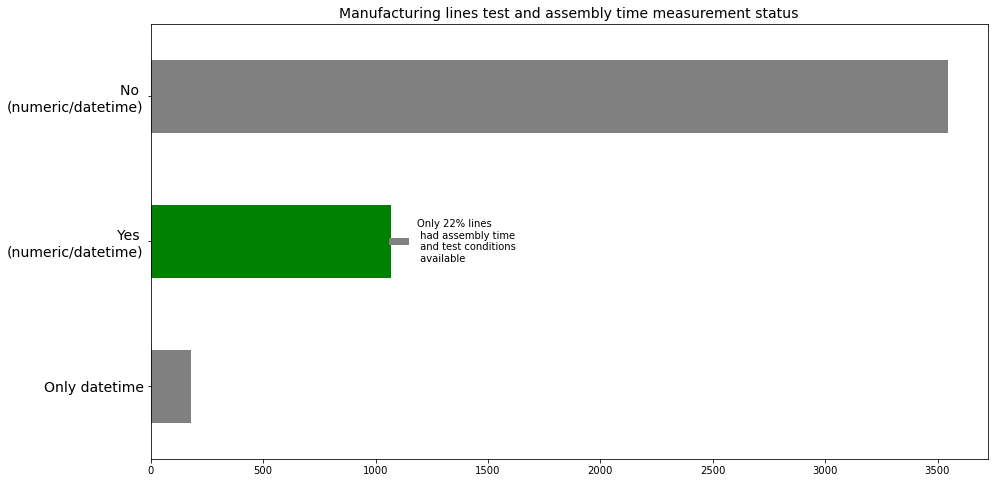

In [32]:
measurement_status = lines_similar['measurement_status'].value_counts()
clr = []
for i in measurement_status:
    if i == 1067:
        clr.append('green')
    else: 
        clr.append('grey')

lables = [1,2,3]
_ = plt.figure(figsize = (15,8))
_ = measurement_status.sort_values(ascending = True).plot(kind = 'barh', color = clr, label = 'Only 22% lines\n had assembly time\n and test conditions\n available')
_ = plt.yticks(np.arange(3),labels = ['Only datetime', 'Yes \n(numeric/datetime)', 'No \n(numeric/datetime)'], fontsize = 14)
_ = plt.title("Manufacturing lines test and assembly time measurement status", fontsize = 14)
_ = plt.legend(loc = 'center',bbox_to_anchor=(.36,.5),frameon= False)

_ = plt.show()
#print('Measurement Collection Status:\n', measurement_status)

### Observation: 
1. Based on above, 22% lines had  both assembly time and test observations. 
2. It is possible, these lines represent major assembly operations, hence maintaining these would be critical. 

### Heatmap of manufacturing lines similar to Maximum Defect line: 
1. Blue color represents high similarity close to 100%
2. Red color represents low similarity lines under 20%

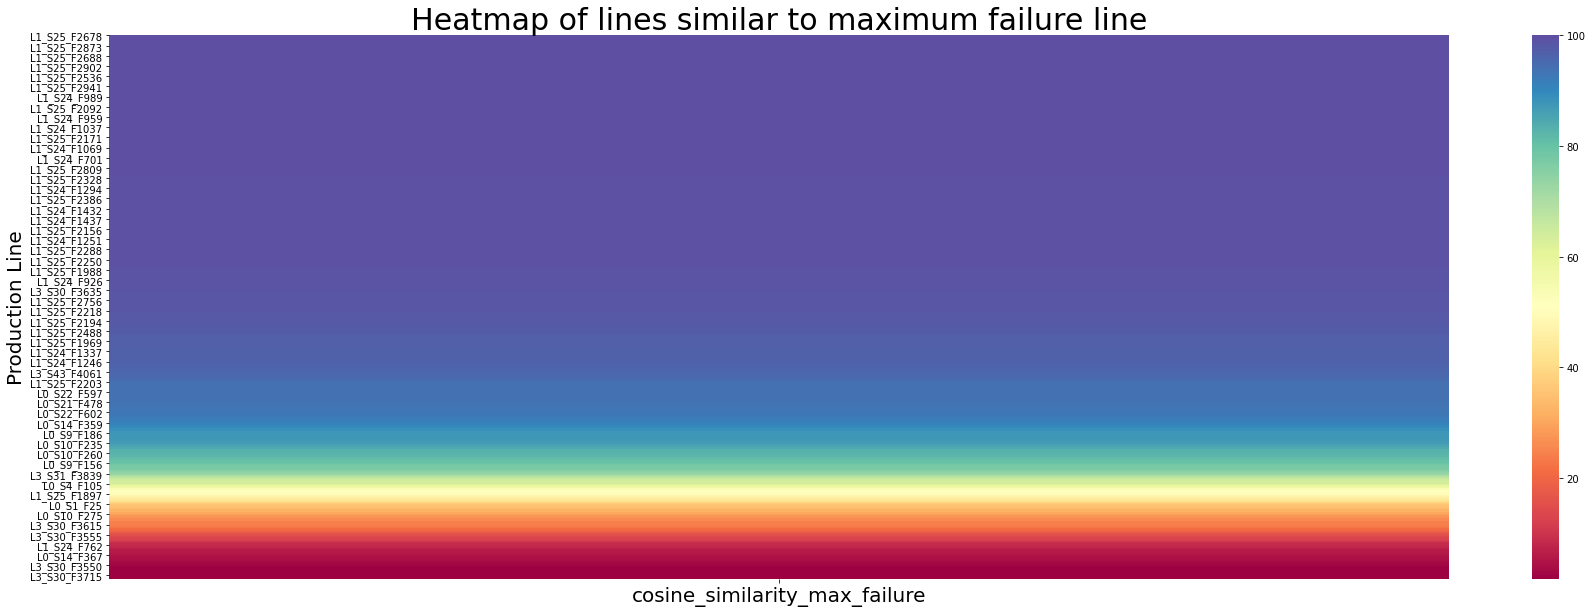

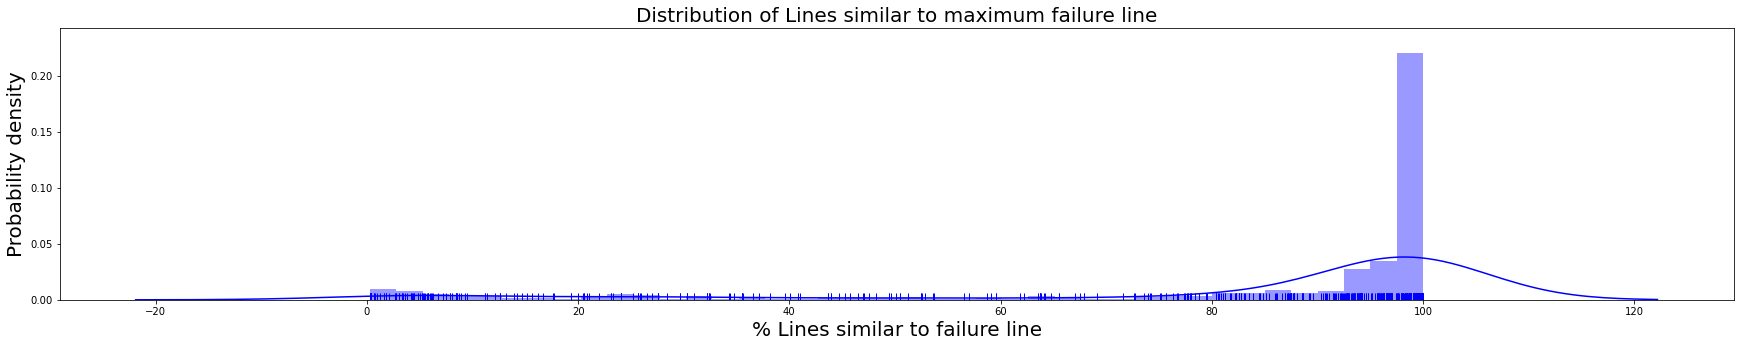

In [33]:
#Heatmap: Manufacturing lines similar to maximum defect line:
_ = plt.figure(figsize= (30,10))
similar_heatmap= pd.DataFrame(lines_similar[['production_line_category','cosine_similarity_max_failure']][lines_similar['cosine_similarity_max_failure'].notnull()])
similar_heatmap = similar_heatmap.set_index('production_line_category')
sns.heatmap(data = similar_heatmap.sort_values(by = 'cosine_similarity_max_failure', ascending = False), cmap = 'Spectral', robust = True)
_ = plt.ylabel('Production Line', fontsize = 20)
_ = plt.xticks(fontsize = 20)
_ = plt.title('Heatmap of lines similar to maximum failure line', fontsize = 30)
_ = plt.show()

#Distribution plot: 
_ = plt.figure(figsize= (30,5))
sns.distplot(similar_heatmap['cosine_similarity_max_failure'], norm_hist=True, rug = True, color = 'blue')
_ = plt.xlabel('% Lines similar to failure line', fontsize = 20)
_ = plt.ylabel('Probability density', fontsize = 20)
_ = plt.title('Distribution of Lines similar to maximum failure line', fontsize = 20)
_ = plt.show()

### Observation: 
1. From heatmap above, we can spot % similarity of manufacturing lines with the maximum failure line.
Example: Lines closer to 100% similarity are represented by blue color at the top of the heatmap, while lines under 20% similarity are placed at the bottom of the heatmap. 

2. Furthermore, from distribution plot, I noticed a bi-modal distribution in similarity pattern, which suggests that lines at these similarity levels in a breakdown situation is likely to impact neighboring lines more closely than others. This was a similar pattern we observed from the 'plot of line failures' earlier during numerical analysis, where we noticed formation of clusters mid-way in the graph. It's interesting to see that a more similar and prominent pattern may occur using cosine similarity, for other percentages of maximum line defect.    

3. To investigate this further, let's us categorize severity of maintenance and plot it.

### Maintenance severity based on cosine similarity maximum failure:

In [34]:
#Create bins based on high, medium and low maintenance severity: 
similar_heatmap['maintenance_severity'] = pd.cut(similar_heatmap['cosine_similarity_max_failure'], bins = 3, labels=['low_maintenance', 'medium_maintenance', 'high_maintenance'])
low_maintenance_lines = similar_heatmap[similar_heatmap['maintenance_severity']=='low_maintenance']
medium_maintenance_lines = similar_heatmap[similar_heatmap['maintenance_severity']=='medium_maintenance']
high_maintenance_lines = similar_heatmap[similar_heatmap['maintenance_severity']=='high_maintenance']

#Display index:
#display(low_maintenance_lines.index, medium_maintenance_lines.index, high_maintenance_lines.index)

#Get number of lines in each category: 
number_of_lines_per_category = len(low_maintenance_lines), len(medium_maintenance_lines), len(high_maintenance_lines)
number_of_lines_per_category

(137, 59, 871)

In [35]:
#For plotting index values of manufacturing lines: 

#Lines 100% similar to max failure line: 
values_100 = high_maintenance_lines[high_maintenance_lines['cosine_similarity_max_failure']==100].reset_index()
#values_100 = [i for i in values_100['production_line_category']]
#print('Lines requiring maintenance in near term:', values_100['production_line_category'].values)
len(values_100)

115

### Plot of Maintenance Severity and Corresponding Manufacturing lines: 

In [36]:
#Low maintenance lines: 
low_maintenance_lines_keys = (alt.Chart(low_maintenance_lines.reset_index())
                              .mark_circle(color = 'darkorange',
                                           size = 25)
                              .encode(
                                  x = alt.X('production_line_category:N',
                                            axis = alt.Axis(labelAngle=-45,
                                                            labelFontSize=5,
                                                            title = 'Low maintenance (upto 52.4% similarity)',
                                                            titleAnchor='start',
                                                            titlePadding=-75)),
                                  tooltip = ['production_line_category:N'])
                              .properties(width = 800))


#Medium maintenance lines: 
medium_maintenance_lines_keys = (alt.Chart(medium_maintenance_lines.reset_index())
                                 .mark_circle(color = 'red',
                                              size = 50)
                                 .encode(
                                     x = alt.X('production_line_category:N',
                                               axis = alt.Axis(labelAngle=-45,
                                                               labelFontSize=5,
                                                               title = 'Medium maintenance (upto 75.4% similarity)',
                                                               titleAnchor='start',
                                                               titlePadding=-75)),
                                     tooltip = ['production_line_category:N'])
                                 .properties(width = 800))



#High maintenance lines:
high_maintenance_lines_keys = (alt.Chart(values_100)
                               .mark_circle(color = 'blue',
                                            size = 100)
                               .encode(
                                   x = alt.X('production_line_category:N',
                                             axis = alt.Axis(#values= values_100, 
                                                             labelAngle=-45,
                                                             labelFontSize=6,
                                                             title= 'High maintenance (100% similarity)',
                                                             titleAnchor='start', 
                                                             titlePadding=-75)),
                                   tooltip = ['production_line_category:N'])
                               .properties(width = 800))

mainteance_distribution = (alt.Chart(similar_heatmap.reset_index())
                           .mark_boxplot(size = 200)
                           .encode(
                               x = alt.X('maintenance_severity:N', title = 'Maintenance Severity'),
                               y = alt.Y('count(cosine_similarity_max_failure):Q', 
                                         title= '% Lines similar to failure line'),
                               color = 'maintenance_severity:N')
                           .properties(width = 800,
                                       height = 400,
                                       title= 'Manufacturing lines by maintenance severity'))

(mainteance_distribution &  (high_maintenance_lines_keys) & medium_maintenance_lines_keys & low_maintenance_lines_keys).configure_axis(grid=False)


alt.VConcatChart(...)

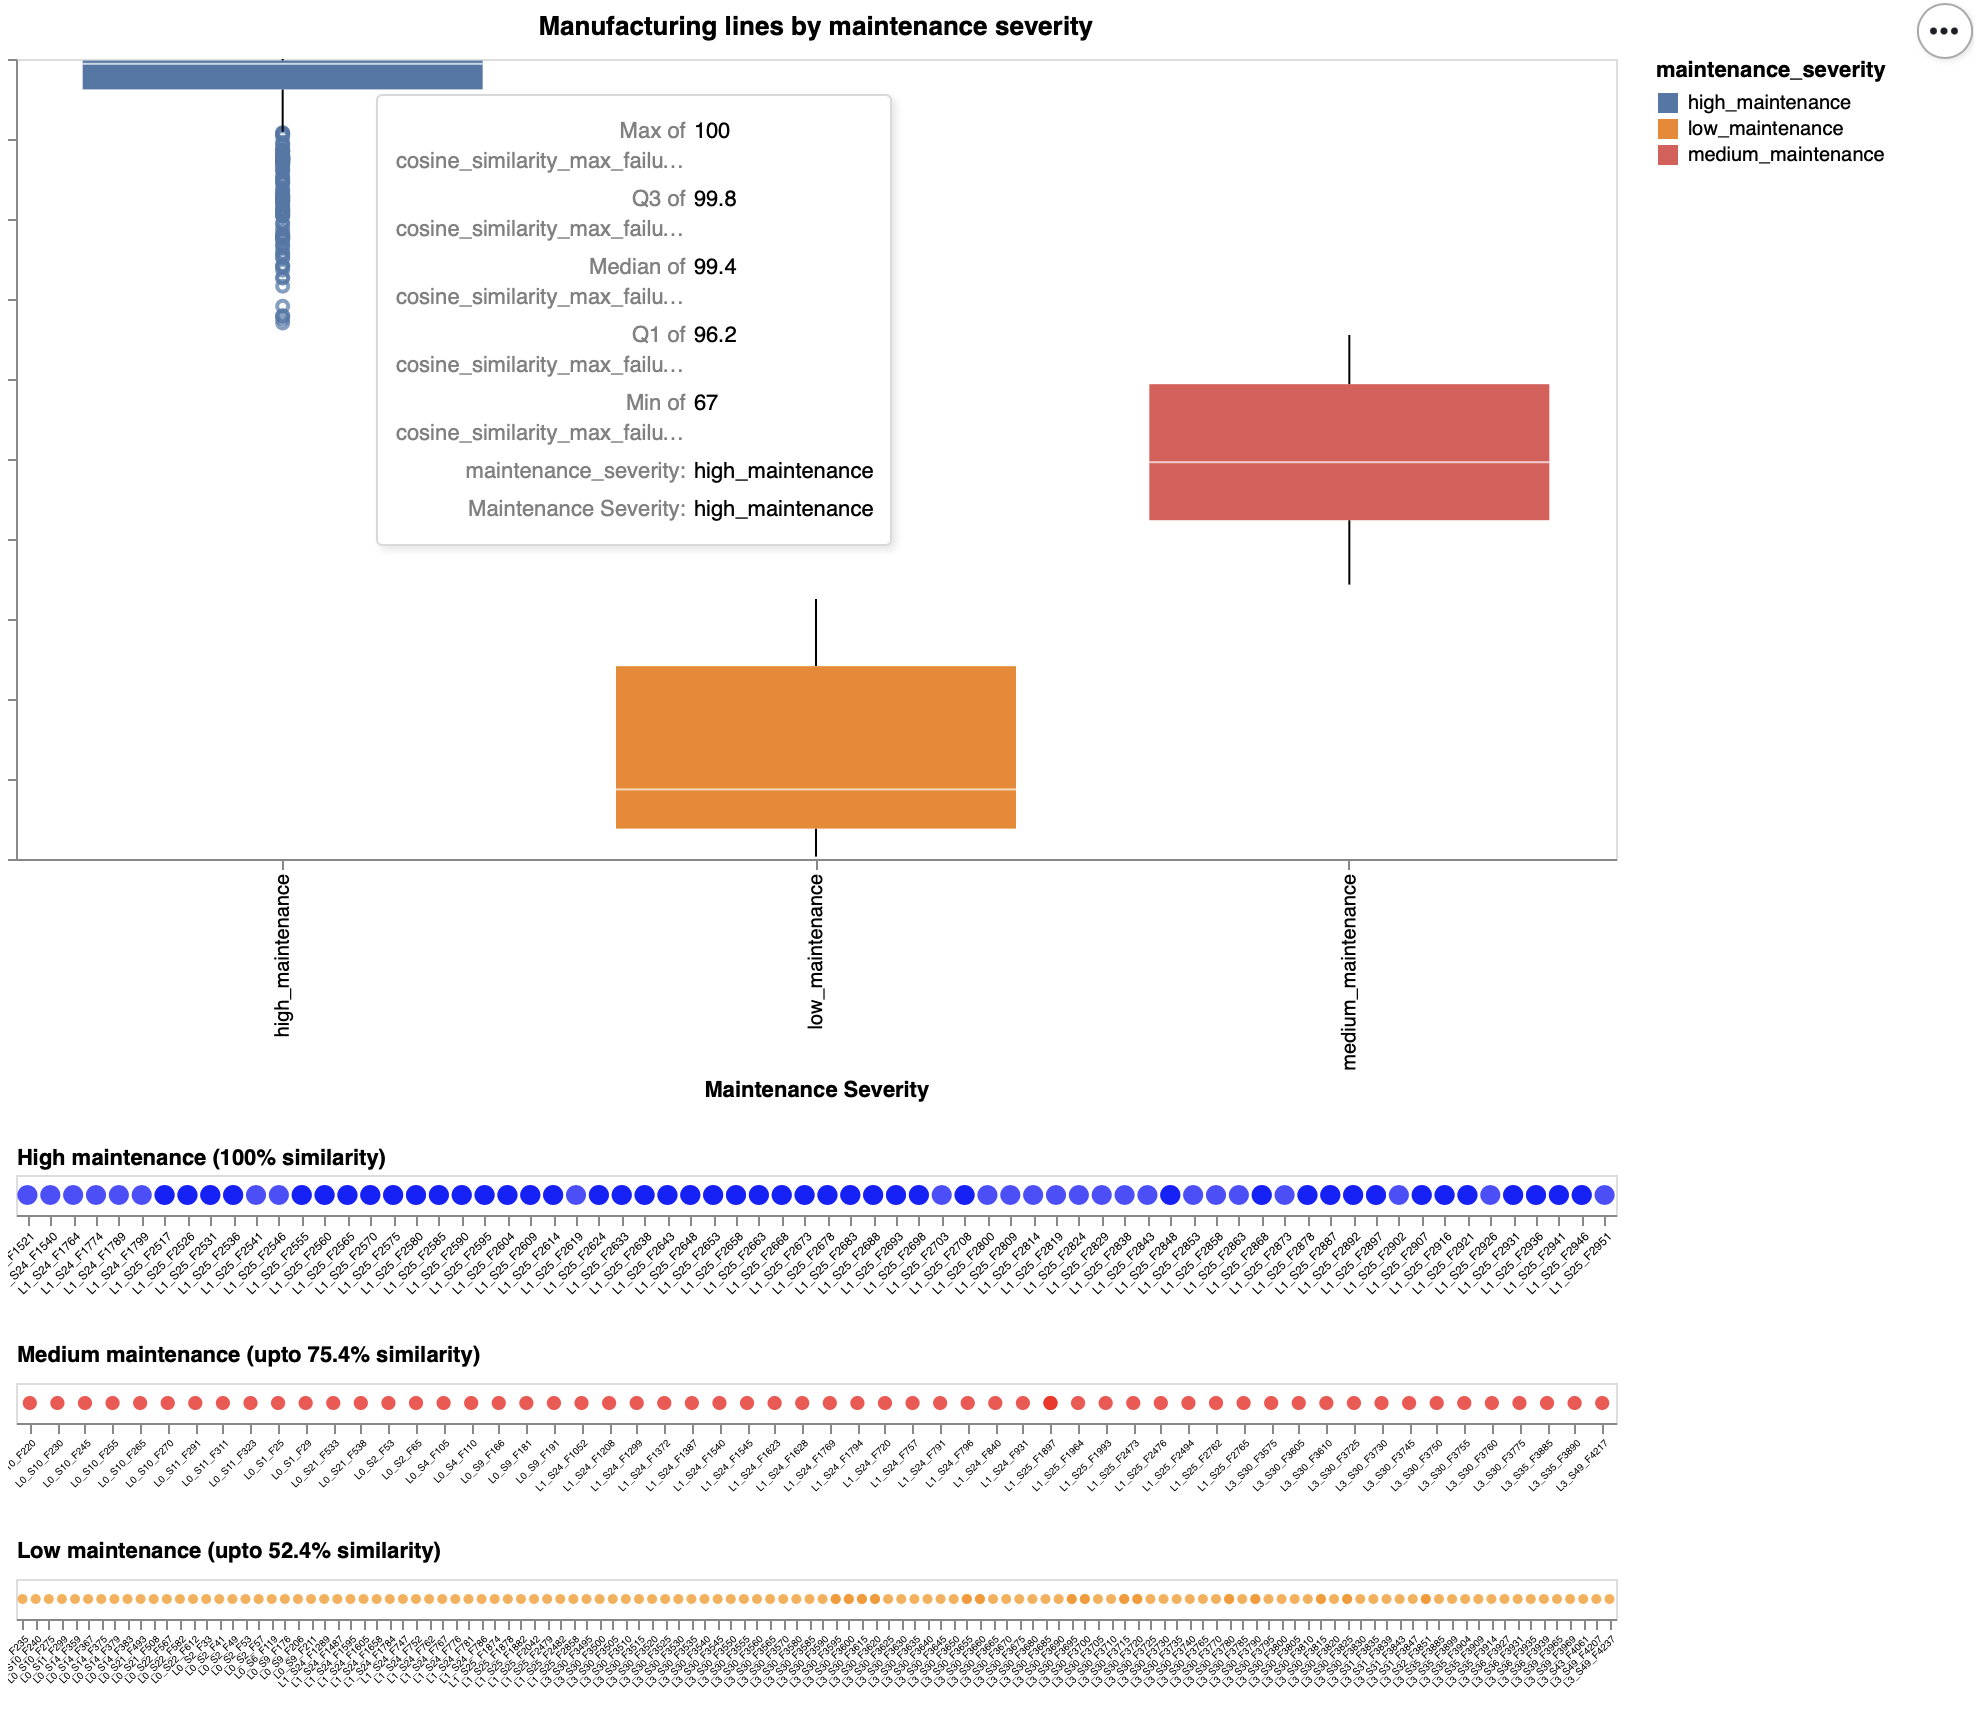

### Observation: 
1. There are 115 high maintenance severity lines, which showed 100% similarity with the maximum failure line 'L1_S25_F2546' at 28%. This represents 11% lines out of 1067 lines which had test and assembly time available. 

2. In real environment, instead of using  a single line as a maximum failure line, we can use a combination of failure line (as an investigative tool) to see which other lines share similar attributes and would likely require more maintenance. 

3. We can also add and remove cosine features to study similarity patterns based on user needs. 